In [9]:
from ROOT import TH1D, TCanvas, TF1, std
from pyLCIO import EVENT, UTIL, IOIMPL, IMPL
#from UTIL import CellIDDecoder
import matplotlib.pyplot as plt
import numpy as np
import h5py
import matplotlib as mpl

plt.rcParams.update({'font.size': 17})

from functions import Esumhit

def getTotE(data, xbins, ybins, layers):
    data = np.reshape(data,[-1, layers*xbins*ybins])
    etot_arr = np.sum(data, axis=(1))
    return etot_arr


In [18]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


color_list = []
color_list.append('dimgrey')
color_list.append('black')


linewidth_list = []
linewidth_list.append(1.5)
linewidth_list.append(2)

    
linestyle_list = []
linestyle_list.append('-')
linestyle_list.append('--')

fillcolor_list = []
fillcolor_list.append('lightgrey')
fillcolor_list.append('red')


def plt_geant4(data_real, data_real2, energy_center, maxE, minE, bins, xtitle,save_title):
    figSE = plt.figure(figsize=(8,8))
    axSE = figSE.add_subplot(1,1,1)
    lightblue = (0.1, 0.1, 0.9, 0.3)
    
   
    pSEa = axSE.hist(data_real, bins=bins, range=[minE, maxE], density=None, edgecolor=color_list[0],
    #weights=np.ones_like(data_real)/(float(len(data_real))),  
                   label = "orig", linewidth=linewidth_list[0],color=fillcolor_list[0],
                   histtype='stepfilled')

   

    pSpnEb = axSE.hist(data_real2, bins=pSEa[1], range=None, density=None, edgecolor=color_list[1],
    #weights=np.ones_like(data_fake)/(float(len(data_fake))), , 
                   label = "orig", linewidth=linewidth_list[1], linestyle=linestyle_list[1],
                   histtype='step')

 
    
    axSE.set_xlabel(xtitle, family='serif')
    axSE.set_xlim([minE, maxE])
    #axSE.set_ylim([0, 0.28])

  
    
    posX = 0.02
    axSE.text(posX,
            0.97,
            '{:d} GeV Photons'.format(energy_center), horizontalalignment='left',verticalalignment='top', 
             transform=axSE.transAxes)

    axSE.text(posX, 0.65, 'Geant4 (Pure LCIO hits)', horizontalalignment='left',verticalalignment='top', 
             transform=axSE.transAxes, color = color_list[0])
    axSE.text(posX, 0.60, 'Geant4 (Hdf5 file 30x30x40)', horizontalalignment='left',verticalalignment='top', 
             transform=axSE.transAxes, color = color_list[1])
    
    plt.subplots_adjust(left=0.18, right=0.95, top=0.95, bottom=0.18)
    #plt.yscale('log')
    figSE.patch.set_facecolor('white')

    plt.savefig(save_title+ str(energy_center)+"_leak.png")

In [3]:
g4_sim = Esumhit("photon20-angle_REC.slcio", 3000, "EcalBarrelCollection" )

In [11]:
f = h5py.File('photon20-5.hdf5','r')
layers = f['ecal/layers']
showers = layers[:]

In [13]:
g4_sim_box = getTotE(showers,30,40,30)

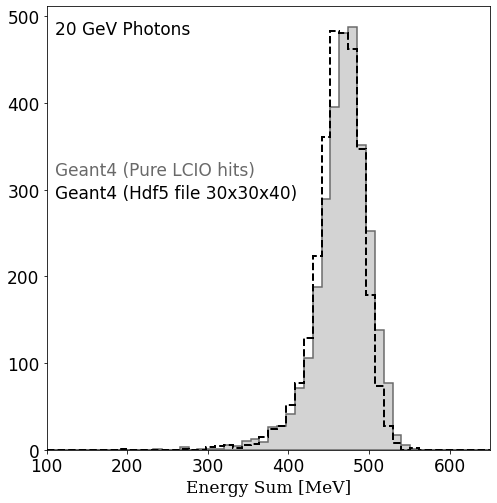

In [21]:
plt_geant4(g4_sim*1000, g4_sim_box, 20, 650, 100, bins=50, xtitle="Energy Sum [MeV]",save_title="plots/leak-comp")